## Machine Learning with Tree-Based Models in Python

### CHAPTER 1. Classification and Regression Trees (CART)

#### 1.1 Decision tree for classification

* Sequence of if-else questions about individual features
* **Objective**: infer class labels
* Able to capture non-linear relationships between features and labels
* Don't require feature scaling like *standardization*

In [1]:
# classification tree in scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# get dataset
breast_df = pd.read_csv('4_datasets/breast_cancer.csv')
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# extract X, y and split data
X = breast_df[['radius_mean', 'concave points_mean']].values
y = breast_df['diagnosis']=='M'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# create a tree model
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.91


In [3]:
# logistic regression VS. classification tree
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy for logreg: {:.2f}".format(acc))


Test set accuracy for logreg: 0.89


In [4]:
# create a list containing two classifiers
# clfs = [logreg, dt]

# create plot function
# since the function is too complicated, we will skip this

import matplotlib.pyplot as plt

# def plot_labeled_decision_regions(X,y, models):
#     '''
#     Function producing a scatter plot of the instances contained
#         in the 2D dataset (X,y) along with the decision
#         regions of two trained classification models contained in the
#         list 'models'.
#     Parameters
#         X: pandas DataFrame corresponding to two numerical features
#         y: pandas Series corresponding the class labels
#         models: list containing two trained classifiers
#     '''
#
#     if len(models) != 2:
#         raise Exception('''
#                 Models should be a list containing only two trained classifiers.       ''')
#     if not isinstance(X, pd.DataFrame):
#             raise Exception('''
#             X has to be a pandas DataFrame with two numerical features.
#                     ''')
#     if not isinstance(y, pd.Series):
#                 raise Exception('''        y has to be a pandas Series corresponding to the labels.        ''')
#     fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
#     for i, model in enumerate(models):
#             plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
#             ax[i].set_title(model.__class__.__name__)
#             ax[i].set_xlabel(X.columns[0])
#             if i == 0:
#                 ax[i].set_ylabel(X.columns[1])
#                 ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
#                 ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
#                 plt.tight_layout()
#                 plt.show()

# plot
# plot_labeled_decision_regions(X_test, y_test, clfs)

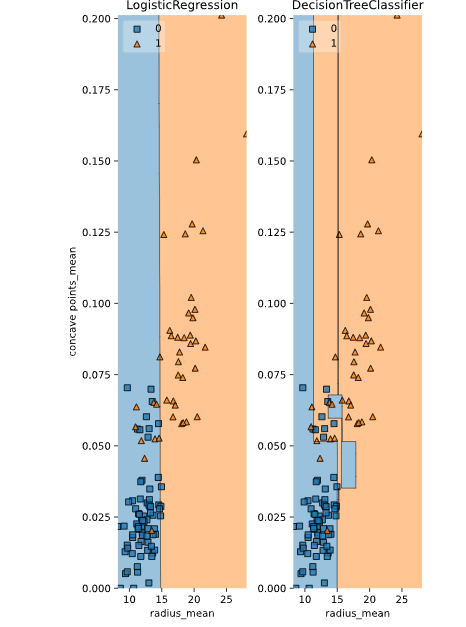

In [5]:
# show plot from local file instead
from IPython import display
display.Image("Images/4_logreg_vs_decision_tree.PNG")

#### 1.2 Classification tree Learning

* **Decision-Tree**: data structure consisting of a hierarchy of nodes
* **Node**: question or prediction

Three kinds of nodes:
1. **Root**: no parent node, question giving rise to two children nodes
2. **Internal node**: one parent node, question giving rise to two children nodes
3. **Leaf**: one parent node, no children nodes -> *prediction*

* The **information gain** is key to a classification tree
* The goal is to *maximize* the information gain (IG) after each split

The criteria to measure the impurity of a node -> I(node):
1. gini index (default in DT model)
2. entropy

The classification tree learning process:
* Nodes are grown recursively
* At each node, split the data based on feature f and split-point sp to maximize IG(node)
* If IG(node)=0, declare the node a leaf

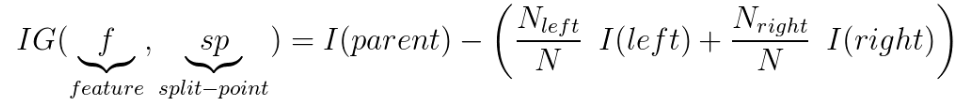

In [6]:
# information gain equation image
from IPython import display
display.Image("Images/5_information_gain.PNG")

In [7]:
# using gini and entropy as information gain criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# get dataset
breast_df = pd.read_csv('4_datasets/breast_cancer.csv')
breast_df.head()
print(breast_df.shape)

# clean data and split data
breast_df = breast_df.drop(['id', 'Unnamed: 32'], axis=1)
X = breast_df.drop('diagnosis', axis=1).values
y = breast_df['diagnosis']== 'M'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

(569, 33)


In [8]:
# make a DT model with gini
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_pred, y_test)

# make a DT model with entropy
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_pred, y_test)

# compare results
print("Accuracy achieved by using entropy: ", accuracy_entropy)
print("Accuracy achieved by using the gini index: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9230769230769231
Accuracy achieved by using the gini index:  0.9230769230769231


#### 1.3 Decision-Tree for Regression

* Use decision-tree to solve regression problems
* The target is continuous value
* It is able to capture non-linear trend
* The information criterion for Regression-Tree is as follows:

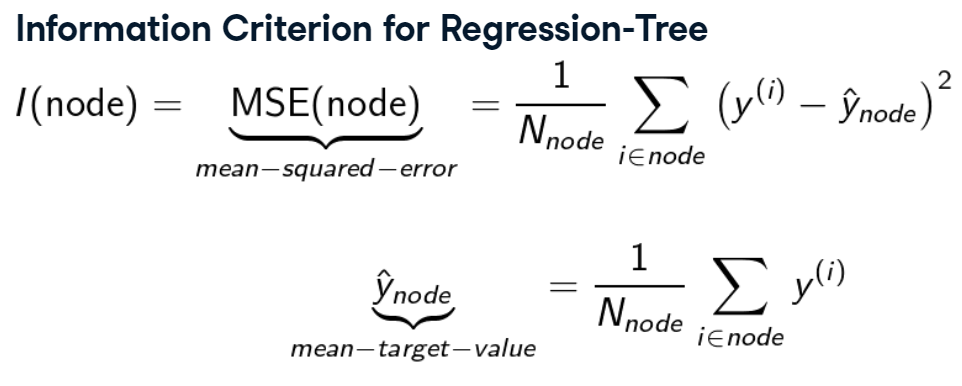

In [12]:
# show image for information criterion
from IPython import display
display.Image("Images/5_information_criterion_regression.PNG")

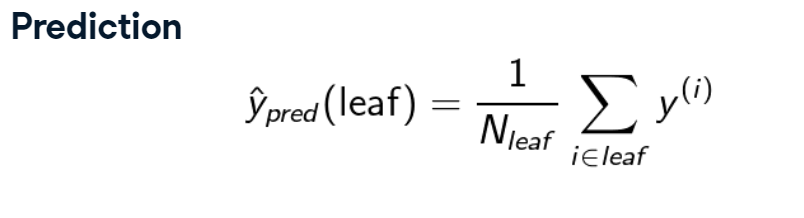

In [13]:
# show image for prediction
display.Image("Images/5_prediction.PNG")

In [17]:
# regression tree in scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# get dataset
auto_mpg = pd.read_csv('4_datasets/auto-mpg.csv')

# clean data
auto_mpg = pd.get_dummies(auto_mpg)
auto_mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [19]:
# extract and split data
X = auto_mpg.drop('mpg', axis=1)
y = auto_mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=3)

# craete a DT regression model
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)
dt.fit(X_train, y_train)

# evaluate model
y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print("Decision Tree test set RMSE: {:.2f}".format(rmse_dt))

Decision Tree test set RMSE: 4.37


In [20]:
# compare with Linear regression model
from sklearn.linear_model import LinearRegression

# create a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# evaluate model
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)
print("Linear regression test set RMSE: {:.2f}".format(rmse_lr))

Linear regression test set RMSE: 5.10


### CHAPTER 2. The Bias-Variance Tradeoff

#### 2.1 Generalization Error

*

### CHAPTER 3. Bagging and Random Forests

### CHAPTER 4. Boosting

### CHAPTER 5. Tuning